Source  : https://www.deeplearningbook.org/contents/mlp.html

# Introduction

**Deep feedforward networks** , also called <font color='lighblue'>**feedforward neural networks**</font> , or **multilayer perceptron** (MLPs), are the quintessential deep learning models. The goals of a feedforward network is to approximate some function f*. For example, for a classifier,  $y=f^*(x)$ maps an input $x$ to a category $y$. A  feedforward network defines a mapping $y=f(x;\theta)$ and learns the value of the parameter $\theta$ that resul in the best function approximation.

These models are called **feedforward** because information flows through the function being evaluated from $x$, through the intermediate computations used to define $f$, and finally to the output $y$. There are no **feedback** connections in which outputs of the model are fed back into itself. When feedforward neural networks are extended to include feedback connections, they are called **recurrent neural networks** .

Feedforward neural networks are called **networks** because they are typically represented by composing together many different functions. The model is associated with a directed acyclic graph describing how the functions are composed together. For example, we might have three function $f^{(1)},f^{(2)}$ and $f^{(3)}$ connected in a chain, to form $f(x) = f^{(3)}(f^{(2)}(f^{(1)}(x)))$. These chain structures are the most commonly used structures in neural networks. In this case,

$f^{(1)}$  - **first layer**\
$f^{(2)}$  - **second layer**\
and so  on

**The overall length of the chain gives the <font color='lighblue'>depth </font>of the model.**

The name "deep learning" arose from this terminology. The final layer of a feedforward network is called the <font color='lighblue'>**output layer**.</font>

During neural netowrk training, we drive $f(x)$ to match $f^*(x)$. The training data provides us with noisy, approximate examples of $f^*(x)$ evaluated at different training points. Each example $x$ is accompanied by a label $y \approx f^*(x)$.

The training examples specify directly what the output layer must do at each point $x$; it must produce a value that is close to $y$.
The learning algorithm must decide how to use those layers to produce the desired outout, but the training data do not say what each individual layer should do. Instead, the learning algorithm must decide how to use these layers to best implement an approximation of $f^*$.

One way to understand feedforward networks is to begin with linear models and condider how to overcome their limitations. Linear models, such as logistic regression and linear regression , are appealing because they can be fit effectively and reliably , either in closed form or with convex optimization.


To extend linear models to represent nonlinear function of $x$, we can apply linear model not to $x$ but to a transformed input $\phi(x)$ , where $\phi$ is a nonlinear transformation. We can think of $\phi$ as providing a set of features describing $x$, or as providing a new representation of $x$.

The question is then how to choose the mapping $\phi$ ?

The strategy of deep learning is to learn $\phi$. In this approach , we have a model $y = f(x;\theta,w)=\phi(x;\theta)^Tw$

We now have parameters $\theta$  that we use to learn $\phi$ from a broad class of functions, and parameters $w$ that map from $\phi(x)$ to the desired output. $\phi$ being the <font color='lighblue'>**hidden layer**</font>

We parameterize the representations as $\phi(x;\theta)$ and use the optimization algorithm algorithm to find the $theta$ that corresponds to a good representation.If we wish, this apporach can capture the benefit of the first approach by being highly generic - we do so by using a very broad family $\phi(x;\theta)$. Deep learning can also capture the benefit of the second approach. Human practitioners can encode their knowledge to help generalization by desgining families $\phi(x;\theta)$ that they expect will perform well.

This general principle of improving models by learning features extends beyond the feedforward networks. It is a recurring theme of deep learning that applies to all the kinds of models described throughout this book. Feedforward networks are the application of this application to learning the deterministic mapping from $x$ to $y$ that lack feedback connections.

We begin this chapter with a simple example of a feedforward network. Next, we address each of the desgin decisions needed to deploy a feedforward network.

-- First, training a feedforward network requires making many of the same design decisions as are necessary for a linear model :     
      
        -- chooising the optimizer
        -- the cost function
        -- form of the output units.

-- Feedforward networks have introduced the concept of a hidden layer, and this requires us to choose the <font color='lighblue'>**activation function**</font> that will be used to compuete the hidden layer values.

-- We must also design the architecture of the networks, including how many layers the network should contain, how these layers should be connected to each other and how many units should be in each layer.  We present the <font color='lighblue'>**back-propagation** algorithm and its modern generalizations, which can be used to efficiently compute these gradients.

#  Example : Learning XOR

To make the idea of a feedforward network more concrete , we begin with an example of a fully functioning feedforward netowrk on a very simple learning the $XOR$ function.

The XOR function  ("exclusive or") is an operation on two binary values, $x_1$ and $x_2$. When exactly one of these binary is equal to $1$, the XOR function returns $1$. Otherwise, it returns $0$. The XOR function provides the target function $y=f*(x)$ that we want to learn. Our model provides a function $y= f(x;\theta)$ and our learning algorithm will adapt the parameter $\theta$ to make $f$ as similar as possible to $f^*$.

In this example, we will not be concerned with statistical generalization. We want out network to perform correctly on our four points. $X = \{[0,0]^T,[0,1]^T,[1,0]^T,[1,1]^T\}$. We will train the network in all of these points. The only challenge is to fit the training set.

We can treat this problem as a regression problem and use a mean squared error loss function. In practical applications ,MSE is usually not an appropriate cost function for modeling binary data.

Evaluated on our whole training set, the MSE loss function is

\begin{align}
J(\theta) = \frac{1}{4} \sum_{x\in X} (f^*(x) - f(x;\theta))^2 \tag{6.1}
\end{align}

Now we must choose the form of our model, $f(x;\theta)$ . Suppose that we choose a linear model, with $\theta$ consisting of $w$ and $b$. Out model is defined as

\begin{align}
f(x;w,b)=x^Tw+b \tag{6.2}
\end{align}

Optimized value of  $(f^*(x) - f(x;\theta))^2$ w.r.t $w$

\begin{align}
\frac{\partial J(\theta)}{\partial \theta} &= x^T(y-x^Tw)=0\\
&=x^Ty - x^Txw =0\\
&=w = \frac{x^Ty}{x^Tx}
\end{align}

Here, we add one more column of $[1,1,1,1]$ to the $x$ matrix for the bais term .



In [ ]:
import numpy as np

x = np.array([[0,0,1],[0,1,1],[1,0,1],[1,1,1]])
x_T_x_I = np.linalg.inv(np.dot(x.T,x))
y = np.array([0,1,1,0])
x_T_y = np.dot(x.T,y)
w = np.round(np.dot(x_T_y,x_T_x_I),2)
print(f"Weight Matrix : {w}")
print(f"weights = {w[0:2]}")
print(f"Bias = {w[-1]}")

Weight Matrix : [0.  0.  0.5]
weights = [0. 0.]
Bias = 0.5


After solving the normal equations ,we obtain $w=0,b=\frac{1}{2}$.  The linear model simply puts $0.5$ everywhere. Why does this happen ?  The figure below shows how a linear model is not able to represent the XOR function.

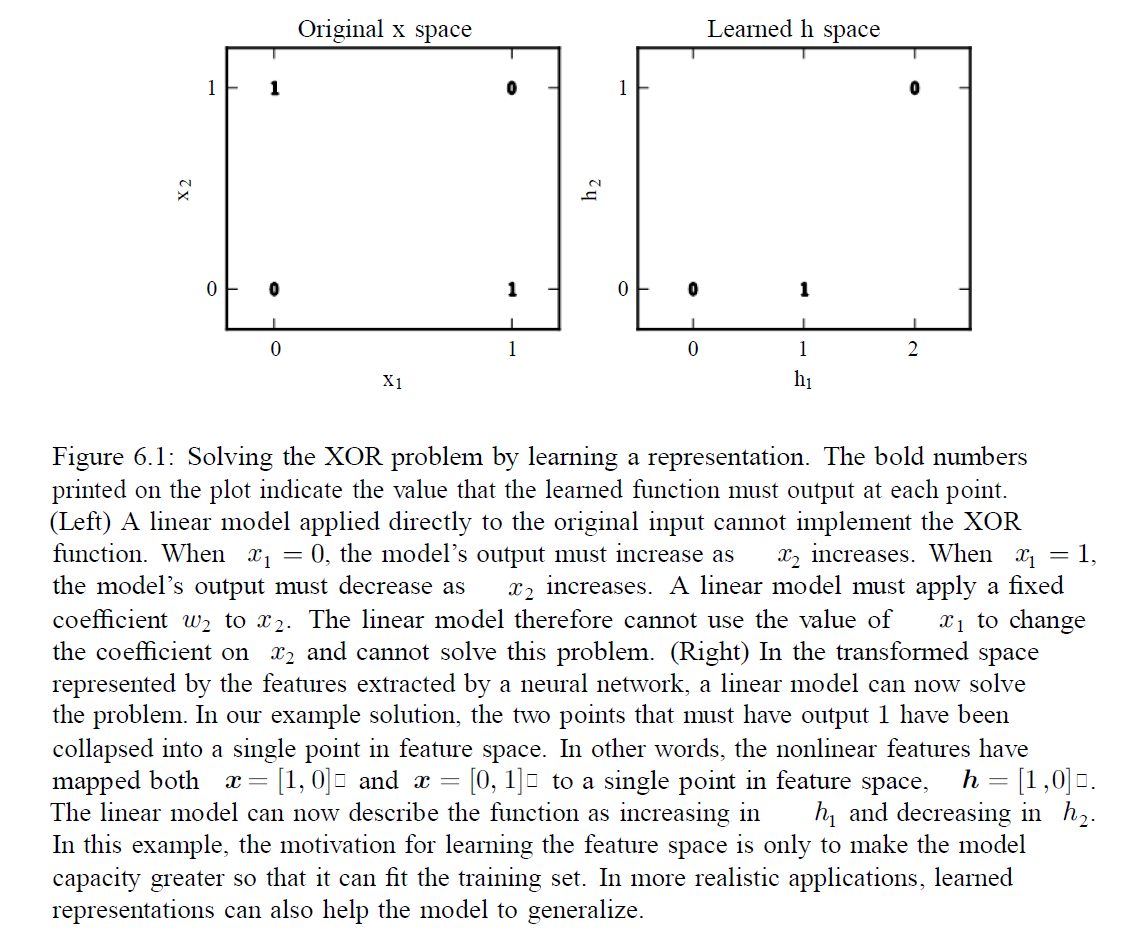

One way to solve this problem is to use a model that learns a different feature space in which a linear model is able to represent the solution.

Specifically, we will introduce a simple feedforward network with one hidden layer containing two hidden units.

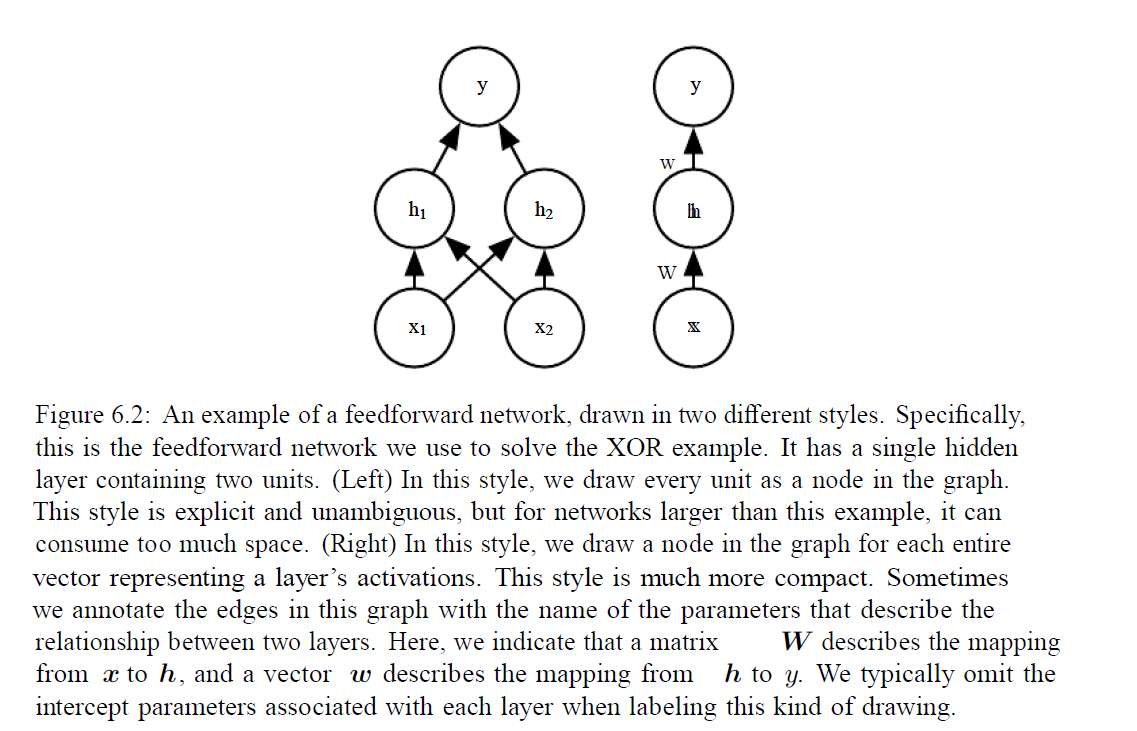

This feedforward network layer has a vector of hidden units $h$ that are  computed by a function $f^{(1)}(x;W,c)$. The values of these hidden units are then used as the input for a second layer. The second layer is the output layer of the network. The output layer is still just a linear regression model, but now it is applied to $h$ rather than to $x$. The network now contains two functions chained together.

$h = f^{(1)}(x;W,c)$\
$y = f^{(2)}(h;w,b)$,

with the complete model being

$f(x;W,w,c) = f^{(2)}(f^{(1)}(x))$

What function should $f^{(1)}$ compute ?

Linear models have served well so far, and it may be tempting to make $f^{(1)}$ linear as well. Unfortunately, if $f^{(1)}$ were linear, then the feedforward network as a whole would remain a linear function of its input.
Ignoring the intercept terms for the moment , suppose $f^{(1)}(x)=W^Tx$ and $f^{(2)}(h)=h^Tw$ . Then $f(x)=x^TWw$. We could represent this function as $f(x)=x^Tw`$ where $w`=Ww$.

Clearly, we must use a nonlinear function to describe the features. Most neural networks do so using an affine transformation controlled by learned parameters followed by a fixed nonlinear function called an <font color='lighblue'>**activation function**</font>. We use that strategy here, by defining $h = g(W^Tx+c)$, where $W$ provides the weights of a linear transformation and $c$ the biases. Previously, to describe a linear regression model, we used a vector of weights and a scalar bias parameter to describe an affine transformation from an input vector to an output scalar. Now, we describe an affine transformation from a vector $x$ to a vector $h$, so an entire vector of bias parameters is needed. The activiation function $g$ is typically chosen to be a function that is applied element-wise, with $h_i = g(x^TW_{:,i}+c_i)$. In modern neural networks, the default recommendation is to use the <font color='lighblue'>**rectified linear unit**</font>, or **ReLU** defined by the activation function $g(z) = max(0,z)$

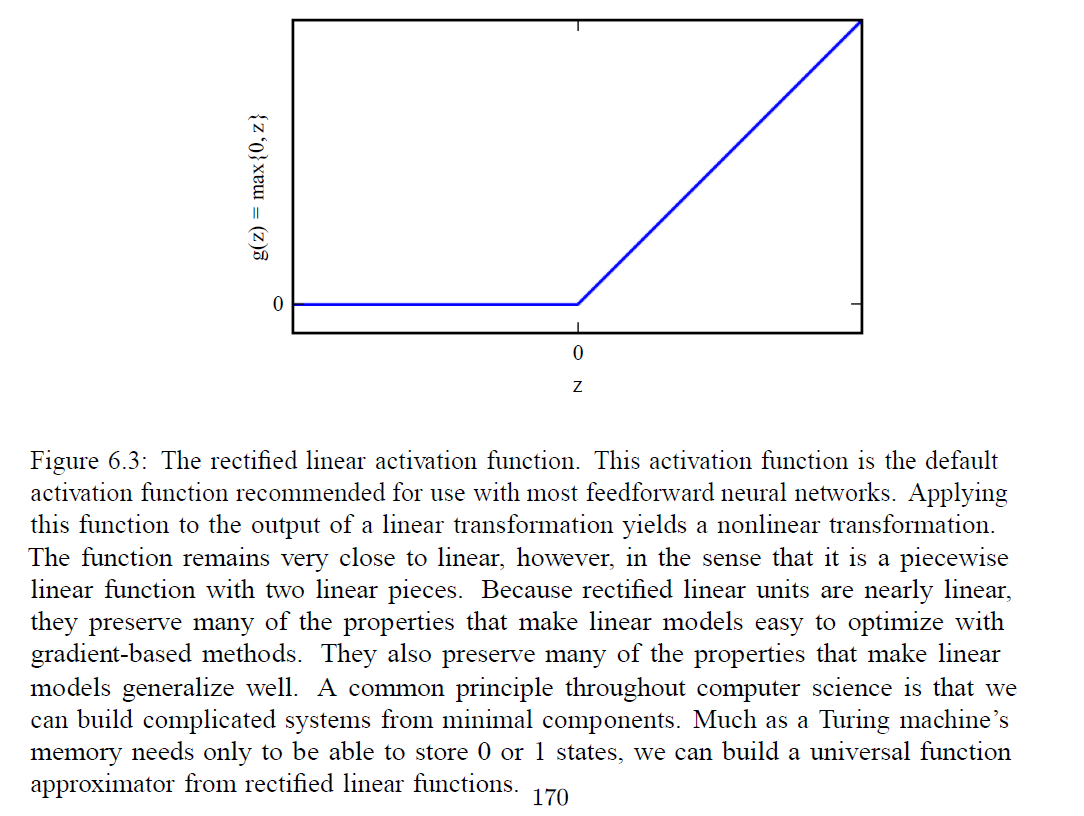

We can now specify our complete network as

\begin{align}
f(x;W,c,w,b) = w^T max\{0,W^Tx+c\} +b
\end{align}

We can specify a solution to the XOR problem . Let \
\begin{align}
W =
\begin{bmatrix}
1  & 1 \\
1  & 1
\end{bmatrix}
\end{align}

\begin{align}
c =
\begin{bmatrix}
0 \\
-1  
\end{bmatrix}
\end{align}

\begin{align}
w =
\begin{bmatrix}
1  \\
-2
\end{bmatrix}
\end{align}

$b= 0 $

\begin{align}
X =
\begin{bmatrix}
0 & 0 \\
0 & 1 \\
1 & 0 \\
1 & 1
\end{bmatrix}
\end{align}

The first step in the neural netowrk is to multiply the input matrix by the first layer's weight matrix.

\begin{align}
XW =
\begin{bmatrix}
0 & 0 \\
1 & 1 \\
1 & 1 \\
2 & 2
\end{bmatrix}
\end{align}

Next, we add this bias vector c , to obtain


\begin{bmatrix}
0 & -1 \\
1 & 0 \\
1 & 0 \\
2 & 1
\end{bmatrix}


In this space , all the examples lie along a line with slope $1$. As we move along this line, the output needs to begin at $0$ , then rise to $1$, then drop back to $0$.

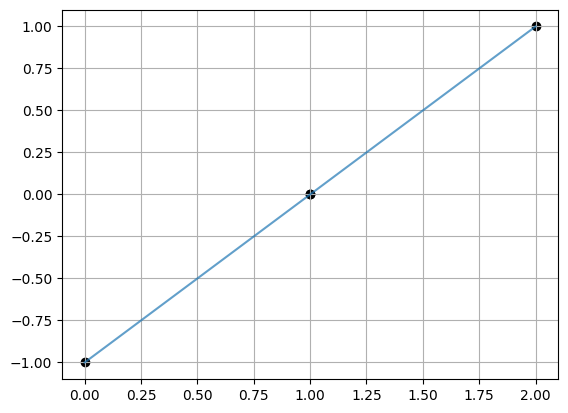

In [ ]:
import matplotlib.pyplot as plt

x = np.array([[0,-1],[1,0],[1,0],[2,1]])
plt.plot(x[:,0],x[:,1],alpha = 0.7)
plt.scatter(x[:,0],x[:,1],color='black')
plt.grid()

A linear model cannot implement such a function. To finish computing the value of $h$ for each example, we apply the rectified linear transformation

\begin{align}
h =
\begin{bmatrix}
0 & 0 \\
1 & 0 \\
1 & 0 \\
2 & 1
\end{bmatrix}
\end{align}

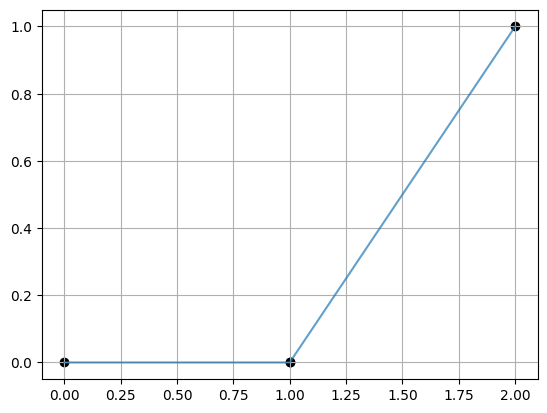

In [ ]:
h = np.array([[0,0],[1,0],[1,0],[2,1]])
plt.plot(h[:,0],h[:,1],alpha = 0.7)
plt.scatter(h[:,0],h[:,1],color='black')
plt.grid()

This transformation has changed the relationship between the examples. They no longer line on a single line. THey now lie in a space where a linear model can solve the problem

We finish with multiplying by the weight vectir $w$


\begin{bmatrix}
0  \\
1 \\ \tag{6.11}
1 \\
0  
\end{bmatrix}

The neural network has obtained the correct answer for every example in the batch.

In this example, we simply specified the solution, then showed that it obtained zero error. In a real situation, there might be billions of model parameters and billions of training examples, so one cannot simply guess the solution as we did here. Instead, gradient-based optimization algorithm can find parameters that produce very little error. The solution we described to the XOR problem is at a global minimum of the loss function, so gradient descent could converge to this point.  The convergence point of gradient depends on the inital values of the parameters. In practice, gradient descent would usually not find clea, easily understood, interger-valued solutions like the one  presented here.

#Notes: Maximum Likelihood Estimation

## Maximum likelihood Least - Squares

When faced with a regression problem, why might linear regression, and specifically why might the least-squares cost function $J$, be a reasonable choice? In this section, we will give a set of probabilistic assumptions , under which least-squares regression is dervied as a very natural algorithm.

Let us assume that the target variables and the inputs are related via the equation

\begin{align}
y^{(i)} = \theta^T x^{(i)} + ϵ^{(i)}
\end{align}

where $ϵ^{(i)}$ is an error term that captures either unmodeled effects ( such as if there are some features very pertinent to predicting housing price, but that we'd left out of the regression, or random noise. Let us further assume that the $ϵ^{(i)}$ are distributed IID(Independently and identically distributed) according to a Gaussian distribution (also called a Normal Distribution) with mean zero and some variance $σ^2$. We can write this assumption as $ϵ^{(i)} ~ \mathcal{N}(0,σ^2)$. I.e the density of $ϵ^{(i)}$ is given by


\begin{align}
p(ϵ^{(i)}) = \frac{1}{\sqrt{2\pi σ}} exp \big( - \frac{(ϵ^{(i)})^2}{2σ^2}\big)
\end{align}

This implies that

\begin{align}
p(y^{(i)}|x^{(i)};\theta) = \frac{1}{\sqrt{2\pi σ}} exp \big( - \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2σ^2}\big)
\end{align}

The notation "$p(y^{(i)}|x^{(i)};\theta)$" indicates that this is the distribution of $y^{(i)}$ given $x^{(i)}$ and parameterized by $\theta$. Note that we should not condition on $\theta$ "$p(y^{(i)}|x^{(i)},\theta)$" since $\theta$ is not a random variable.  We can also write the distribution of $y^{(i)}$ as $y^{(i)}|x^{(i)};\theta \sim \mathcal{N}(\theta^Tx^{(i)},σ^2)$

Given $X$ ( the design matrix, which contains all the $x^{(i)}$'s ) and $\theta$, what is the distribution of the $y^{(i)}$'s ?

The probability of the data is given by $p(\bar{y} |X;\theta)$ This quantity is viewed as a function of $\bar{y}$ ( and perhaps $X$) for a fixed value of $\theta$. <font color='lighblue'>When we wish to explicity view this as a function of $\theta$, we will call is the **likelihood** function.</font>

\begin{align}
L(\theta) = L(\theta;X,\bar{y}) = p(\bar{y}|X;\theta)
\end{align}

Note that by the independence assumption on the $ϵ^{(i)}$'s ( and hence also the $y^{(i)}$'s given the $x^{(i)}$'s, this can also be written

\begin{align}
L(\theta) &= \prod_{i=1}^n p(y^{(i)}|x^{(i)};\theta) \\
&= \prod_{i=1}^n \frac{1}{\sqrt{2\piσ}} exp \big( - \frac{(y^{(i)} - \theta^T x^{(i)})^2}{2\sigma^2}\big)
\end{align}

Now, given the probabilistic model relating the $y^{(i)}$'s and the $x^{(i)}$'s, what is a reasonable way of choosing our best guess of the parameters $\theta$ ?  The principal of <font color='lighblue'>**maximum likelihood**</font> says that we should choose $\theta$ as to make the data as high probability as possible. I.e we should choose $\theta$ to maximize $L(\theta)$.

Instead of maximizing $L(\theta)$, we can also maximize any strictly increasing function of $L(\theta)$. In particular , the derivaties will be a bit simpler if we intead maximize the <font color='lighblue'>**log likelihood**</font>


\begin{align}
l(\theta) &= log L(\theta) \\
&= log \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma}} exp( - \frac{(y^{(i)}-\theta^T x^{(i)})^2}{2σ^2} \big)\\
&= \sum_{i=1}^n log  \frac{1}{\sqrt{2\pi \sigma}} exp( - \frac{(y^{(i)}-\theta^T x^{(i)})^2}{2σ^2} \big) \\
&= n log \frac{1}{\sqrt{2\pi σ}} - \frac{1}{σ^2} \cdot \frac{1}{2} \sum_{i=1}^n (y^{(i)} - \theta^T x^{(i)})^2
\end{align}

<font color='lighblue'>**Hence, maximizing $l(\theta)$ gives the same answer as minimizing**</font>

\begin{align}
\frac{1}{2} \sum_{i=1}^n (y^{(i)} - \theta^T x^{(i)})^2
\end{align}

which we recognize to be $J(\theta)$, the original least_squares cost function.

# Classification and Logistic Regression

Let's now talk about the classification problem. This is just like the regression problem, except that the values we now want to predict take on only a small number of discrete values. For now, we will focus on the <font color='lighblue'>**binary classification**</font> problem in which $y$ can take on only two values , $0$ and $1$.

For instance, if we are trying to build a spam classifier for email, then $x^{(i)}$ may be some features of a peice of email, and $y$ may be $1$ if its is a piece of spam email, and $0$ otherwise. $0$ is also called the <font color='lighblue'>**bnegative class**</font>, and $1$ the <font color='lighblue'>**positive class**</font> and they are sometimes also denoted by the symbols "-" and "+" . Given $x^{(i)}$, the corresponding $y^{(i)}$ is also called the <font color='lighblue'>**label**</font> for the training example.



## Logistic Regression

We would approach the classification problem ignoring the fact that $y$ is discrete-valued, and use our old linear regression algorithm to try to predict $y$ given $x$. However, it is easy to construct examples where this method performs very poorly. Intuitively, it also doesn't makes sense for $h_{\theta}(x)$ to take values larger than $1$ or smaller than $0$ when we know that $ y \in {0,1}$

To fix this, let's change the form for our hypothesis $h_{\theta}(x)$. We will choose

\begin{align}
h_{\theta}(x) = g(\theta^T x) = \frac{1}{1+e^{-\theta^Tx}}
\end{align}

where

\begin{align}
g(z) =  \frac{1}{1+e^{-z}}
\end{align}

is called the <font color ='lighblue'>**logistic function**</font> or the <font color ='lighblue'>**sigmoid function**</font>.
Here is a plot of $g(z)

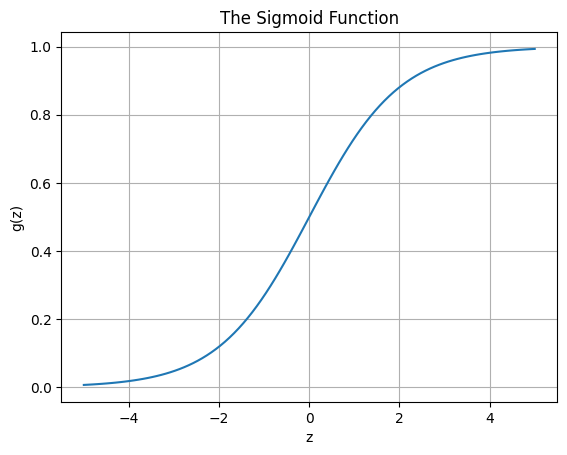

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5,5,100)
y = 1/(1+np.exp(-z))

plt.plot(z,y)
plt.title("The Sigmoid Function")
plt.xlabel("z")
plt.ylabel("g(z)")
plt.grid()

 Notice that $g(z)$ tends towards $1$ as $z → \infty$ and $g(z)$ tends towards $0$ as $z → - \infty$. Moreoever, $g(z)$  and also $h(x)$ , is always bounded between $0$ and $1$.

Before moving on, here's a useful property of the derivatives of the sigmoid function which we write a $g`$

\begin{align}
g`(z) &= \frac{d}{dz} \frac{1}{1+e^{-z}}\\
&= \frac{1}{(1+e^{-z})^2} (e^{-z})\\
&= \frac{1}{(1+e^{-z})} (1 - \frac{1}{(1+e^{-z})})\\
&= g(z)(1-g(z))
\end{align}

So, give nthe logistic regression model, how we fit $\theta$ for it? Following how we saw least squares regression could be derived as the maximum likelihood estimator under a set of assumptions, let's endow our classification model with a set of probabilistic assumptions , and then fit the parameters. via maximum likelihood.

Let us assume that

\begin{align}
&P(y=1|x;\theta) = h_{\theta}(x)\\
&P(y=0|x;\theta) = 1 - h_{\theta}(x)
\end{align}

\
Note that this can be written more compactly as

\
\begin{align}
p(y|x;\theta) = (h_{\theta}(x))^y (1-h_{\theta}(x))^{(1-y)}
\end{align}

\
Assuming that the $n$ training examples where generated indepedently, we can then write down the likelihood of the parameters as

\
\begin{align}
L(\theta) &= p(\bar{y}|X;\theta)\\
&= \prod_{i=1}^n p(y^{(i)} | x^{(i)} ; \theta)\\
&= \prod_{i=1}^n (h_{\theta}(x^{(i)}))^{y^{(i)}} (1-(h_{\theta}(x^{(i)}))^{1-y^{(i)}}
\end{align}

As before, it will be easier to maximize the log likelihood:

\
$l(\theta) = \log L(\theta) = \sum_{i=1}^n y^{(i)} \log h(x^{(i)}) + (1-y^{(i)}) \log (1 -h(x^{(i)})) $

\
How do we maximize the likelihood? Similar to our derivation in the case of linear regression, we can use gradient ascent. Written in vectorial notation, our updates will therefore be given by $\theta := \theta + \alpha ∇_{\theta} l(\theta)$ ( note the positive rather than negative sign in the update formula, since we're maximizing, rather than minimizing , a function now).  Let's start by working with just one training example $(x,y)$, and take derivatives to derive the stochastic gradient ascent rule:


\begin{align}
\frac{\partial}{\partial \theta_j} l(\theta) &= \bigg(y \frac{1}{g(\theta^T x)} - (1-y) \frac{1}{1-g(\theta^T x)} \bigg) \frac{∂}{∂θ_j} g(\theta^T x)\\
&= \bigg(y \frac{1}{g(\theta^T x)} - (1-y) \frac{1}{1-g(\theta^T x)} \bigg)  g(\theta^T x) (1 -  g(\theta^T x)) \frac{∂}{∂θ_j} \theta^T x\\
&= \bigg(y(1 -  g(\theta^T x))  - (1-y) g(\theta^T x)\bigg) x_j\\
&= y(1 -  h_{\theta}(x)) x_j\\
\end{align}

Above, we used the fact that $g`(z) = g(z) (1 - g(z))$. This therefire gives us the stochastic gradient ascent rule

\begin{align}
\theta_j := \theta_j + \alpha(y^{(i)} - h_{\theta}(x^{(i)}))x^{(i)}_j
\end{align}

**Remark** :  An alternative notational viewpoint of the same loss function is also usefull.

Let $l_{logistic} : R \times \{0,1\} → R_{\geq 0}$